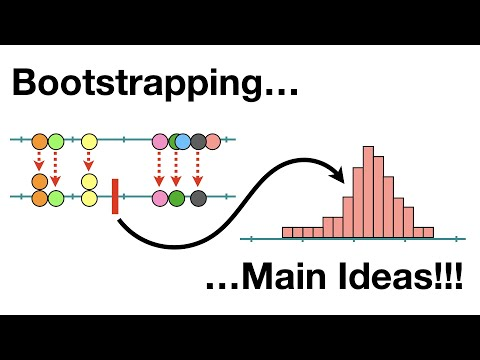

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## Question 1

Standard Deviation (STD) of the original data measures variance of individual data points around the mean of a dataset. It reflects how much individual data points may differ from the average. Standard Error of the Mean (SEM) in contrast is a measure of how much the sample mean is expected to fluctuate from the true population mean. SEM can be calculated by dividing the STD of the original data by the square root of the sample size. SEM reflects how accurately the sample mean represents the true population mean.

To summarize, standard deviation focuses on the spread of the data itself while the standard error of the mean looks at the reliability of the sample mean compared to the true population mean.

## Question 2
Link to ChatBot session: https://chatgpt.com/share/66ff5bd1-372c-8005-add6-a3f40d54a1aa

To create a 95% confidence interval using the standard error of the mean (SEM), calculate the SEM by finding the standard deviation of the bootstrapped sample means. Then, the 95% confidence interval is the range that covers 95% of these bootstrapped means. This interval reflects how the sample mean might vary if the experiment were repeated multiple times. By using bootstrapping, we simulate this variation and determine the interval that likely includes the true mean, even without running the experiment again.

## Question 3
Link to ChatBot session: https://chatgpt.com/share/66ff5bd1-372c-8005-add6-a3f40d54a1aa

To create a 95% bootstrapped confidence interval without using the standard error of the mean, first generate a large number of bootstrapped datasets by sampling with replacement from the original dataset. Next, calculate the sample mean for each bootstrapped dataset, which creates a distribution of bootstrapped means. Once you have this distribution, sort the bootstrapped means and determine the lower and upper percentiles that encompass 95% of the data. Specifically, the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means define the confidence interval. This method allows you to directly obtain the 95% confidence interval from the bootstrapped means without needing to calculate the standard error.

## Question 4

Link to ChatBot session: https://chatgpt.com/share/66ff5bd1-372c-8005-add6-a3f40d54a1aa

In [3]:
import numpy as np

def bootstrap_ci(data, num_bootstraps=10000, alpha=0.05, statistic=np.mean):
    """
    Calculate the bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: The original sample data (1D array-like).
    - num_bootstraps: The number of bootstrap samples to generate.
    - alpha: The significance level (for a 95% CI, alpha should be 0.05).
    - statistic: The statistic to compute (e.g., np.mean, np.median).
    
    Returns:
    - ci: A tuple containing the lower and upper bounds of the confidence interval.
    """
    # Step 1: Create an array to hold the bootstrap sample means
    bootstrap_samples = np.empty(num_bootstraps)

    # Step 2: Generate bootstrap samples and compute the statistic for each
    for i in range(num_bootstraps):
        # Create a bootstrap sample by sampling with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic for the bootstrap sample
        bootstrap_samples[i] = statistic(sample)

    # Step 3: Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_samples, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_samples, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound

# Example usage
data = np.array([2, 3, 5, 7, 11, 13, 17, 19])  # Sample data
mean_ci = bootstrap_ci(data, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate a 95% bootstrap confidence interval for the median, change the statistic parameter:
median_ci = bootstrap_ci(data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (5.5, 13.875)
95% Bootstrap Confidence Interval for the Median: (3.0, 17.0)


## Question 5

Distinguishing between the population parameter and the sample statistic is essential when constructing confidence intervals because the sample statistic serves as an estimate of the population parameter. The population parameter is a fixed value that describes a characteristic of the entire population (e.g., the true mean), while the sample statistic is derived from a subset of that population (e.g., the sample mean). Confidence intervals are used to quantify the uncertainty around the sample statistic and provide a range of values that likely contains the population parameter. This distinction is crucial because it emphasizes that while we can estimate the population parameter using sample data, there will always be variability and uncertainty involved, which the confidence interval aims to capture. Thus, the confidence interval reflects our level of confidence in our estimate and helps assess how well the sample statistic approximates the true population parameter.

## Question 6
Link to ChatBot session: https://chatgpt.com/share/66ff5bd1-372c-8005-add6-a3f40d54a1aa

#### What is the process of bootstrapping?
So, bootstrapping is like taking a shortcut in statistics to understand how reliable our estimates are without having to gather a ton of new data. Here’s how it works: Imagine you have a sample of data points from a population—like scores from a class, for example. Instead of doing a bunch of experiments or collecting more data, you take your sample and create new datasets from it. You do this by randomly picking data points from your original sample with replacement, which means you can pick the same score more than once. You keep doing this over and over, say, a thousand times, and each time you calculate a statistic—like the mean or median. In the end, you’ll have a bunch of these statistics to look at, which lets you see how much they vary. It’s like having a mini version of your entire population, built from your sample!

#### What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to help us estimate how uncertain our statistics are. When we compute something like the average from our sample, we want to know how much that average might change if we took another sample. Bootstrapping gives us a way to create a distribution of possible averages (or whatever statistic we’re looking at) based on our original sample. This means we can calculate things like confidence intervals, which tell us how likely it is that our sample statistic represents the true population value. In short, it helps us understand the reliability of our estimates without needing a ton of additional data.

#### If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
Let’s say you think the average score of all students in your school is 75, but you only have scores from a sample of 30 students. You can use bootstrapping to check if that guess makes sense! Here’s what you’d do: First, take your sample of 30 scores and create a bunch of new datasets by randomly selecting scores from that sample, with replacement. Each of those new datasets will also have 30 scores. Then, for each dataset, you calculate the average score. After doing this a thousand times, you’ll have a distribution of average scores.

## Question 7

#### Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean is not zero?
A confidence interval that overlaps zero suggests that, given the variability in our sample data, the true average effect could plausibly be zero. The null hypothesis usually states that there is no effect (the average response to the drug is zero). Even if our observed sample mean is 0.5, this single estimate is not enough to confidently conclude that the drug has an effect because the confidence interval includes zero. This means we don’t have strong evidence against the null hypothesis, leading us to "fail to reject" it.

#### What would lead to the opposite conclusion of "rejecting the null hypothesis"?
If the confidence interval does not overlap zero—say it ranges from 0.2 to 0.8—this indicates that all plausible values for the population mean are above zero. In this case, we have sufficient evidence to reject the null hypothesis, meaning we can confidently assert that the drug likely has a significant effect (either positive or negative). This distinction helps us understand that while the sample mean gives us one piece of information, the confidence interval provides a broader view of the potential average effects, allowing us to assess the evidence more rigorously.

#### Summary
In summary, the confidence interval helps us account for variability in our sample data. If it overlaps zero, we can't confidently assert an effect, but if it doesn’t, we can reject the null hypothesis and support the idea that there’s an average effect. This understanding is crucial in statistics, guiding how we interpret sample results in the context of larger populations.








## Question 8
Link to ChatBot session: https://chatgpt.com/share/66ff5bd1-372c-8005-add6-a3f40d54a1aa

*CSV file from my github repository*

Welcome to the Vaccine Data Analysis Assignment.
This analysis aims to assess the effectiveness of a new vaccine created by AliTech.

In this context, the Null Hypothesis (H0) states that the vaccine has no effect on health scores, meaning there is no significant difference between the initial and final health scores of patients.


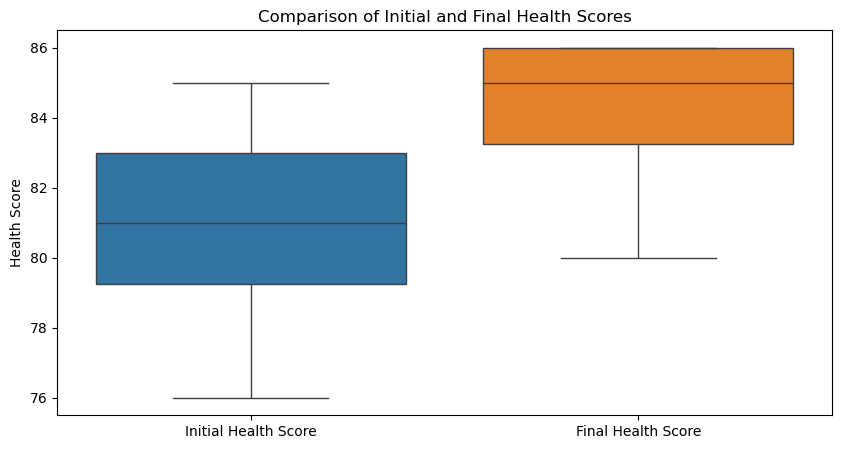


Mean Initial Health Score: 81.00
Mean Final Health Score: 84.30

95% Confidence Interval for Final Health Score: [83.  85.4]

Methodology: We used bootstrapping to generate a sampling distribution of the final health scores and calculated a 95% confidence interval.
This method allows us to estimate the variability of the sample mean without assuming a normal distribution.


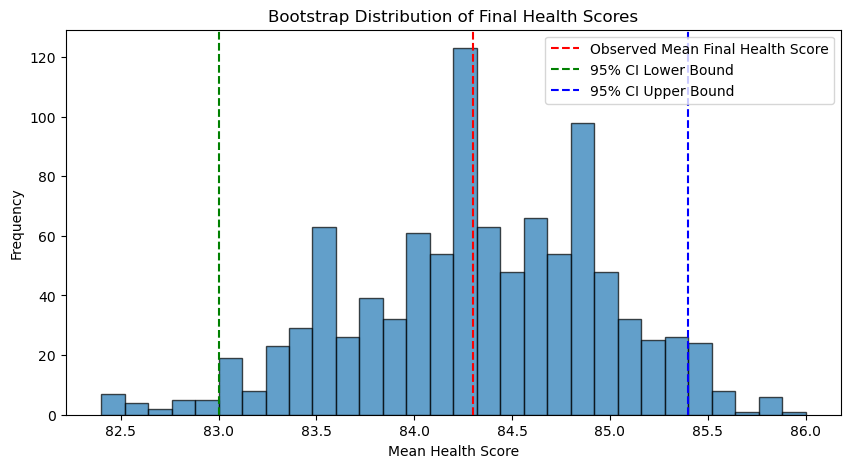


We can reject the Null Hypothesis of no effect, as the entire confidence interval is above the mean initial health score.

Conclusion: Based on the bootstrap confidence interval analysis, we find evidence to suggest that the vaccine does have an effect on improving health scores.

Further Considerations: Future studies could involve larger sample sizes and additional variables such as long-term effects of the vaccine.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Load the data from my CSV file on GitHub
url = 'https://raw.githubusercontent.com/violajad/SAT130_FW24/main/vaccine_data.csv'
df = pd.read_csv(url)

# 1. Problem Introduction
print("Welcome to the Vaccine Data Analysis Assignment.")
print("This analysis aims to assess the effectiveness of a new vaccine created by AliTech.")

# 2. Explanation of Null Hypothesis
print("\nIn this context, the Null Hypothesis (H0) states that the vaccine has no effect on health scores, meaning there is no significant difference between the initial and final health scores of patients.")

# 3. Data Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.xticks(ticks=[0, 1], labels=['Initial Health Score', 'Final Health Score'])
plt.show()

# 4. Quantitative Analysis
# Calculate mean health scores
mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()

print(f"\nMean Initial Health Score: {mean_initial:.2f}")
print(f"Mean Final Health Score: {mean_final:.2f}")

# Bootstrapping for confidence interval
def bootstrap(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Bootstrap the final health scores
boot_means = bootstrap(df['FinalHealthScore'].to_numpy())
conf_interval = np.percentile(boot_means, [2.5, 97.5])

print(f"\n95% Confidence Interval for Final Health Score: {conf_interval}")

# 5. Methodology Code and Explanations
print("\nMethodology: We used bootstrapping to generate a sampling distribution of the final health scores and calculated a 95% confidence interval.")
print("This method allows us to estimate the variability of the sample mean without assuming a normal distribution.")

# Supporting Visualizations
plt.figure(figsize=(10, 5))
plt.hist(boot_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=mean_final, color='r', linestyle='--', label='Observed Mean Final Health Score')
plt.axvline(x=conf_interval[0], color='g', linestyle='--', label='95% CI Lower Bound')
plt.axvline(x=conf_interval[1], color='b', linestyle='--', label='95% CI Upper Bound')
plt.title('Bootstrap Distribution of Final Health Scores')
plt.xlabel('Mean Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 6. Findings and Discussion
# Assessing the null hypothesis
if conf_interval[0] > mean_initial:
    print("\nWe can reject the Null Hypothesis of no effect, as the entire confidence interval is above the mean initial health score.")
else:
    print("\nWe fail to reject the Null Hypothesis of no effect, as the confidence interval includes the mean initial health score.")

# 7. Conclusion regarding a Null Hypothesis of "no effect"
print("\nConclusion: Based on the bootstrap confidence interval analysis, we find evidence to suggest that the vaccine does have an effect on improving health scores.")

# 8. Further Considerations
print("\nFurther Considerations: Future studies could involve larger sample sizes and additional variables such as long-term effects of the vaccine.")
